**간단한 컨브넷 만들기**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1)) # (28, 28, 1) 형태의 3차원 텐서를 입력
#  32개의 3x3 크기의 필터를 사용하는 합성곱 레이어를 정의하고, 입력 이미지에 적용
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) # 텐서를 1차원으로 평탄화해서 모든 픽셀 값들을 연속적인 벡터 형태로 변환
# 출력 레이어로 완전 연결 레이어로, 10개의 뉴런을 가지며 각 뉴런은 이미지가 특정 클래스에 속할 확률을 출력
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**모델의 `summary()` 메서드 출력**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**MNIST 이미지에서 컨브넷 훈련하기**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 7s 4ms/step - loss: 0.1612 - accuracy: 0.9498
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0433 - accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0302 - accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0222 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0167 - accuracy: 0.9949


**컨브넷 평가하기**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0318 - accuracy: 0.9902
테스트 정확도: 0.990


### 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

### Kaggle 데이터 내려받기
1. 캐글 API Token 발급
- 캐글 사이트 account 페이지 이동 > API 섹션 내 CREATE NEW API TOKEN 클릭 > 다운로드된 파일 kaggle.json 확인

https://www.kaggle.com/settings

In [ ]:
# colab에서 kaggle 설치
!pip install kaggle

In [ ]:
# 이후에 google colab이 제공하는 file을 통해 kaggle json 업로드
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"crayonhanchan","key":"6a1c4b9bdbbc64fd4c11f3ad6028aa17"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  kaggle.json  sample_data


In [ ]:
# !ls /root -la
!ls ~ -la

total 72
drwx------ 1 root root 4096 Mar 19 00:06 .
drwxr-xr-x 1 root root 4096 Mar 18 23:45 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Mar 15 13:43 .cache
drwx------ 1 root root 4096 Mar 19 00:08 .config
drwxr-xr-x 5 root root 4096 Mar 15 13:42 .ipython
drwx------ 1 root root 4096 Mar 15 13:42 .jupyter
drwxr-xr-x 3 root root 4096 Mar 19 00:06 .keras
drwx------ 3 root root 4096 Mar 15 13:15 .launchpadlib
drwxr-xr-x 1 root root 4096 Mar 15 13:42 .local
drwxr-xr-x 4 root root 4096 Mar 15 13:42 .npm
drwx------ 3 root root 4096 Mar 19 00:06 .nv
-rw-r--r-- 1 root root  161 Jul  9  2019 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  165 Mar 15 13:42 .wget-hsts


In [ ]:
# .kaggle 디렉토리 생성
!mkdir -p ~/.kaggle

# json 파일 .kaggle 디렉토리로 이동
!cp kaggle.json ~/.kaggle/

# 권한 변경
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 사용자의 홈 디렉토리(~) 내의 파일과 디렉토리 목록을 자세한 정보와 함께 나열
!ls ~/.kaggle/ -la

total 16
drwxr-xr-x 2 root root 4096 Mar 19 00:08 .
drwx------ 1 root root 4096 Mar 19 00:08 ..
-rw------- 1 root root   69 Mar 19 00:08 kaggle.json


In [ ]:
# Kaggle CLI 도구는 Kaggle의 API를 사용하여 데이터셋을 다운로드하고, Kaggle 대회에 참가하며, 데이터셋을 업로드하는 등 다양한 기능을 제공
!pip install --upgrade kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111941 sha256=c6ec1b28e2ea9fa0f0706ba85e176b9ecb1de397bcb9ea71cc3a7526bbe315cf
  Stored in directory: /root/.cache/pip/wheels/53/34/8c/8ca3450d17206d9e37e1ee3aeb47cbb2873d22a9e0c60eb137
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [ ]:
!kaggle --version

Kaggle API 1.6.6


In [ ]:
!pip show kaggle

Name: kaggle
Version: 1.6.6
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats?rvi=1

Copy Api command > kaggle datasets download -d biaiscience/dogs-vs-cats

In [ ]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

cats_vs_dogs_small  dogs-vs-cats.zip  drive  kaggle.json  sample_data  test  train


In [ ]:
!unzip -qq dogs-vs-cats.zip # qq' 옵션은 'quiet' 모드로 unzip 명령어가 해제 과정의 세부 정보를 출력하지 않습니다.
# !unzip -qq train.zip

In [ ]:
!ls train

In [ ]:
!mv train train1
!mv test test1

In [ ]:
!ls

cats_vs_dogs_small  dogs-vs-cats.zip  drive  kaggle.json  sample_data  test1  train1


In [ ]:
!!mv /content/train1/train /content/
!mv /content/test1/test /content/

In [ ]:
!rm -rf test1 train1

In [ ]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test  train


**이미지를 훈련, 검증, 테스트 디렉토리로 복사하기**

코드를 실행하면, 'cats_vs_dogs_small' 디렉토리 아래에 'cat'과 'dog' 각각의 이미지가 포함된 'train', 'validation', 'test' 세 개의 서브 디렉토리가 생성됩니다. 이렇게 하면 원본 이미지 데이터셋의 일부를 추출하여 새로운, 더 작은 데이터셋을 만드는 데 유용

- os 모듈은 운영 체제와 상호 작용하기 위한 기능을 제공합니다.
- shutil 모듈은 파일과 파일 컬렉션을 관리(예: 복사, 이동)하기 위한 고수준 연산을 제공합니다.
- pathlib 모듈은 파일 시스템 경로를 객체로 취급하여 경로 관련 작업을 보다 쉽게 처리할 수 있게 해줍니다.

In [ ]:
# 원본 이미지 데이터셋에서 일부 데이터를 추출하여 새로운 하위 데이터셋을 생성.
# 이 하위 데이터셋은 훈련, 검증, 테스트의 세 가지 부분으로 구성
import os, shutil, pathlib

# pathlib의 주요 기능으로는 경로 조작, 파일 시스템 정보 조회, 파일/디렉토리 생성 및 삭제 등이 있습니다.
original_dir = pathlib.Path("train") # 'train' 폴더를 원본 데이터셋의 디렉토리로 설정
new_base_dir = pathlib.Path("cats_vs_dogs_small") # 'cats_vs_dogs_small' 폴더를 새로운 데이터셋의 베이스 디렉토리로 설정

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"): # 각 카테고리에 대해 작업을 수행
        dir = new_base_dir / subset_name / category # 각 카테고리의 새로운 디렉토리 경로를 생성
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, # shutil.copyfile을 사용하여 원본 디렉토리에서 새 디렉토리로 이미지 파일을 복사
                            dst=dir / fname) # 원본 디렉토리에서 해당 파일을 복사하여 새 디렉토리에 붙여넣기

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
!ls cats_vs_dogs_small/

test  train  validation


### 모델 만들기

**강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3)) # 높이와 너비가 각각 180 픽셀이며 3개의 채널(RGB)을 가진 이미지 입력
x = layers.Rescaling(1./255)(inputs) # 입력 이미지의 픽셀 값을 [0, 1] 범위로 재조정
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x) # 32개의 필터를 사용하며, 각 필터의 크기는 3x3
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

**모델 훈련 설정하기**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### 데이터 전처리

**`image_dataset_from_directory`를 사용하여 이미지 읽기**

TensorFlow Keras의 image_dataset_from_directory 함수를 사용하여 디렉토리에 저장된 이미지 데이터로부터 데이터셋을 생성

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

# 'new_base_dir / "train"' 경로에서 훈련 데이터셋을 생성.
# 여기서 각 이미지의 크기는 180x180으로 조정되며, 한 번에 32개의 이미지를 포함하는 배치(batch)가 생성
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

텐서플로우 데이터셋 객체 이해

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16)) # 평균 0, 표준편차 1의 정규분포에서 랜덤하게 생성된 1000x16 크기의 2D 배열을 생성
# 이 데이터셋 객체는 TensorFlow에서 제공하는 다양한 데이터 파이프라인 구축 기능(예: 배치 처리, 셔플링, 반복)을 활용할 수 있게 해 줍니다.
dataset = tf.data.Dataset.from_tensor_slices(random_numbers) # Numpy 배열을 TensorFlow 데이터셋으로 변환

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2: # 처음 3개의 요소를 확인한 후 반복을 중단
        break

(16,)
(16,)
(16,)


In [ ]:
# tf.data.Dataset 객체는 데이터셋의 element_spec 속성을 통해 각 요소의 데이터 구조 확인
print(dataset.element_spec)

TensorSpec(shape=(16,), dtype=tf.float64, name=None)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
# None 부분은 배치 크기
print(batched_dataset.element_spec)

TensorSpec(shape=(None, 16), dtype=tf.float64, name=None)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [ ]:
print(reshaped_dataset.element_spec)

TensorSpec(shape=(4, 4), dtype=tf.float64, name=None)


**`Dataset`이 반환하는 데이터와 레이블 크기 확인하기**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


**`Dataset`을 사용해 모델 훈련하기**

In [ ]:
# ModelCheckpoint 콜백을 사용하여 훈련 도중에 모델을 저장
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", # 저장된 파일의 이름
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 8s 64ms/step - loss: 0.7080 - accuracy: 0.5235 - val_loss: 0.6911 - val_accuracy: 0.6000
Epoch 2/30
63/63 [==============================] - 3s 42ms/step - loss: 0.6929 - accuracy: 0.5450 - val_loss: 0.6909 - val_accuracy: 0.5040
Epoch 3/30
63/63 [==============================] - 3s 42ms/step - loss: 0.6938 - accuracy: 0.5405 - val_loss: 0.6878 - val_accuracy: 0.5080
Epoch 4/30
63/63 [==============================] - 3s 42ms/step - loss: 0.6710 - accuracy: 0.5880 - val_loss: 0.6528 - val_accuracy: 0.6150
Epoch 5/30
63/63 [==============================] - 3s 41ms/step - loss: 0.6355 - accuracy: 0.6365 - val_loss: 0.6110 - val_accuracy: 0.6570
Epoch 6/30
63/63 [==============================] - 3s 41ms/step - loss: 0.6226 - accuracy: 0.6715 - val_loss: 0.6002 - val_accuracy: 0.6680
Epoch 7/30
63/63 [==============================] - 3s 42ms/step - loss: 0.5819 - accuracy: 0.7035 - val_loss: 0.5657 - val_accuracy: 0.7020
Epoch 8/30
63

**훈련 정확도와 손실 그래프 그리기**

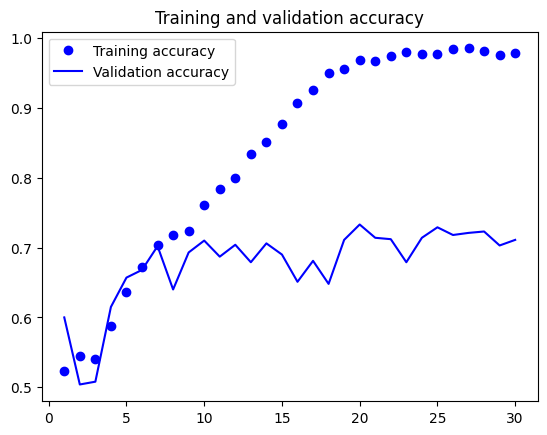

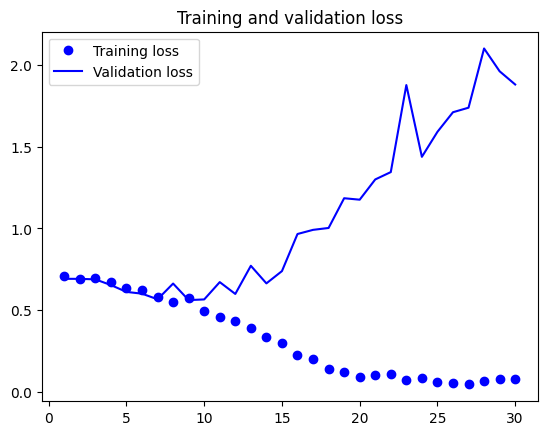

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# EarlyStopping, ModelCheckpoint 콜백을 사용
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", # 저장된 파일의 이름
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks_list)

Epoch 1/30
63/63 [==============================] - 3s 43ms/step - loss: 0.0635 - accuracy: 0.9830 - val_loss: 2.1478 - val_accuracy: 0.6950
Epoch 2/30
63/63 [==============================] - 3s 42ms/step - loss: 0.0403 - accuracy: 0.9890 - val_loss: 1.7983 - val_accuracy: 0.7260
Epoch 3/30
63/63 [==============================] - 3s 41ms/step - loss: 0.0502 - accuracy: 0.9830 - val_loss: 2.0461 - val_accuracy: 0.7210
Epoch 4/30
63/63 [==============================] - 3s 41ms/step - loss: 0.0553 - accuracy: 0.9835 - val_loss: 1.8912 - val_accuracy: 0.7260
Epoch 5/30
63/63 [==============================] - 3s 40ms/step - loss: 0.0292 - accuracy: 0.9900 - val_loss: 2.4117 - val_accuracy: 0.6850
Epoch 6/30
63/63 [==============================] - 3s 40ms/step - loss: 0.0528 - accuracy: 0.9825 - val_loss: 2.3247 - val_accuracy: 0.7160
Epoch 7/30
63/63 [==============================] - 3s 41ms/step - loss: 0.0646 - accuracy: 0.9850 - val_loss: 2.4640 - val_accuracy: 0.7110
Epoch 8/30
63

**테스트 세트에서 모델 평가하기**

In [ ]:
!ls

cats_vs_dogs_small	    dogs-vs-cats.zip  kaggle.json  test
convnet_from_scratch.keras  drive	      sample_data  train


In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 1s 14ms/step - loss: 2.1509 - accuracy: 0.7045
테스트 정확도: 0.705


### 데이터 증식 사용하기

**컨브넷에 추가할 데이터 증식 단계 정의하기**

세 가지 데이터 증강 기법

- layers.RandomFlip("horizontal"): 이미지를 수평 방향으로 무작위로 뒤집습니다. 이는 이미지에 대한 모델의 위치 불변성을 증가시키는 데 도움이 됩니다.

- layers.RandomRotation(0.1): 이미지를 최대 0.1 라디안(약 5.7도) 범위에서 무작위로 회전시킵니다. 회전은 중심을 기준으로 하며, 빈 영역은 근접한 픽셀로 채워집니다.

- layers.RandomZoom(0.2): 이미지를 최대 20% 범위에서 무작위로 확대/축소합니다. 빈 영역은 근접한 픽셀로 채워집니다.

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**랜덤하게 증식된 훈련 이미지 출력하기**

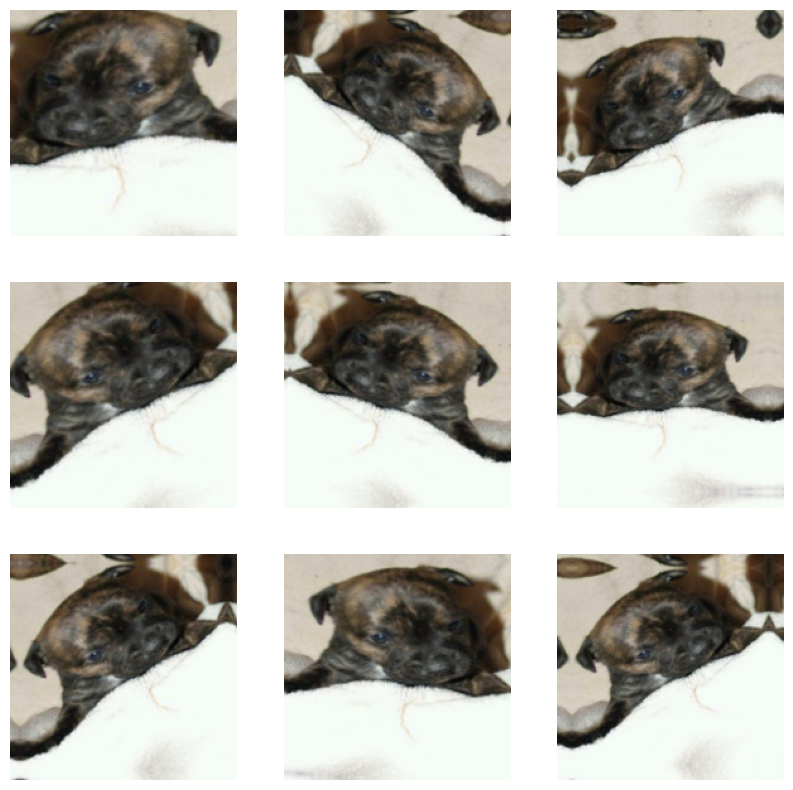

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1): # 학습 데이터셋에서 하나의 배치를 가져오기
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        # "uint8"은 0부터 255까지의 값을 가질 수 있는 8비트 정수 타입을 의미하며, 이는 이미지 데이터를 표현하는 데 일반적으로 사용되는 데이터 타입.
        # astype("uint8")을 호출함으로써, 이미지 데이터가 해당 범위 내에 있도록 보장
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**이미지 증식과 드롭아웃을 포함한 컨브넷 만들기**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**컨브넷 훈련하기**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 5s 47ms/step - loss: 0.6974 - accuracy: 0.4930 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 3s 43ms/step - loss: 0.6929 - accuracy: 0.5195 - val_loss: 0.6918 - val_accuracy: 0.5180
Epoch 3/100
63/63 [==============================] - 3s 43ms/step - loss: 0.6938 - accuracy: 0.5215 - val_loss: 0.6865 - val_accuracy: 0.5220
Epoch 4/100
63/63 [==============================] - 3s 42ms/step - loss: 0.6845 - accuracy: 0.5560 - val_loss: 1.0058 - val_accuracy: 0.5000
Epoch 5/100
63/63 [==============================] - 3s 43ms/step - loss: 0.6700 - accuracy: 0.5990 - val_loss: 0.6572 - val_accuracy: 0.5760
Epoch 6/100
63/63 [==============================] - 3s 42ms/step - loss: 0.6432 - accuracy: 0.6370 - val_loss: 0.7351 - val_accuracy: 0.5250
Epoch 7/100
63/63 [==============================] - 3s 45ms/step - loss: 0.6301 - accuracy: 0.6495 - val_loss: 0.6076 - val_accuracy: 0.6620
Epoch 

**테스트 세트에서 모델 훈련하기**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 1s 13ms/step - loss: 0.4594 - accuracy: 0.7970
테스트 정확도: 0.797


## 사전 훈련된 모델 활용하기

### 사전 훈련된 모델을 사용한 특성 추출

**VGG16 합성곱 기반 층 만들기**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet", # 모델에 ImageNet 데이터베이스에서 훈련된 가중치를 사용하겠다는 의미
    include_top=False, # ImageNet의 클래스 1000개에 대응되는 밀집 연결 분류기의 포함 여부
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**VGG16 특성과 해당 레이블 추출하기**

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 22ms/step


In [ ]:
train_features.shape

(2000, 5, 5, 512)

**밀집 연결 분류기 정의하고 훈련하기**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 15.9135 - accuracy: 0.9240 - val_loss: 6.5911 - val_accuracy: 0.9600
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 3.5553 - accuracy: 0.9750 - val_loss: 7.3856 - val_accuracy: 0.9610
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 2.0424 - accuracy: 0.9815 - val_loss: 7.0462 - val_accuracy: 0.9650
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0619 - accuracy: 0.9890 - val_loss: 4.4402 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.8923 - accuracy: 0.9945 - val_loss: 4.4881 - val_accuracy: 0.9770
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.5188 - accuracy: 0.9935 - val_loss: 5.2214 - val_accuracy: 0.9730
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6606 - accuracy: 0.9940 - val_loss: 5.7171 - val_accuracy: 0.9720
Epoch 8/20
63/63 [=

In [ ]:
!ls

cats_vs_dogs_small			      dogs-vs-cats.zip		kaggle.json  train
convnet_from_scratch.keras		      drive			sample_data
convnet_from_scratch_with_augmentation.keras  feature_extraction.keras	test


**결과를 그래프로 나타내기**

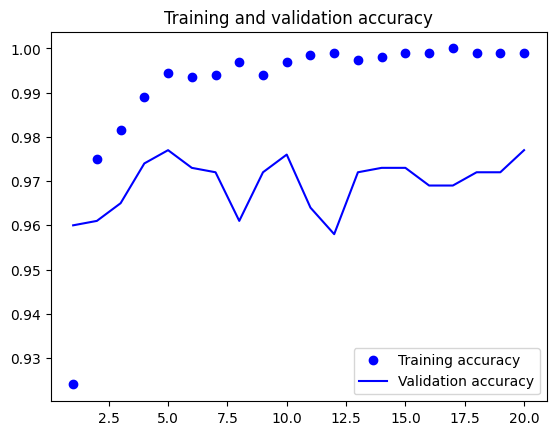

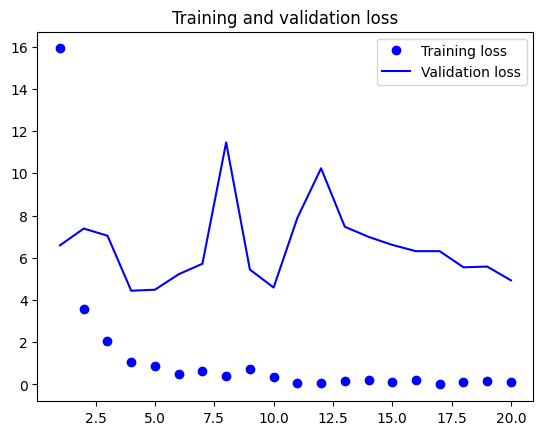

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features,test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 0s 2ms/step - loss: 5.0663 - accuracy: 0.9730
테스트 정확도: 0.973
